# 生成對抗網路 / Generative Adversarial Network (GAN)

串接兩個類神經網路模型，一個負責生成以假亂真的資料(Generator)，另一個則負責辨別資料真偽(Discriminator)。兩個模型會互相對抗，最終目的為訓練出一個能夠產生高仿真資料的產生器。以下 GAN 都是以 [MNIST](http://yann.lecun.com/exdb/mnist/) 手寫數字圖片作為訓練資料。

# demo()

展示出完成的訓練模型，並將所生成的圖片放入output資料夾

In [ ]:
import sys
sys.path.append('.prepared')
import gan as prepared

prepared.demo()

#With 1000 steps, 2 Dense Discriminator, 2 Dense Generator, 100 Dim noise input

# Models 
使用keras所提供的 Sequential model，此種model可以讓加入(.add)的層數(layer)按照加入的順序一一執行

在NN練習中我們宣告為 nn_model = SimpleNN()，在這裡我們用類似的方式宣告model

In [ ]:
from keras.models import Sequential

model = Sequential()

# Dense Layer
keras中所提供的Dense Layer就是神經網路最基礎、沒有變化的Layer，也和前面NN練習所用相同

在Dense中也需要宣告Filter Number、Input長度或形狀以及Activation Function

Dense(Filter Numer, input_shape=, activation=)

由於D和G的input、output大小固定，增加中間的Layer數量來比較output image的差異

將建好的D和G丟入.exe()執行

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

import sys
sys.path.append('.prepared')
import gan as prepared

D = Sequential() #D as Discriminator

#Using D.add(layer)

D.add(Dense(256, input_shape=(784,), activation='relu')) 
# Fileter Number = 256 with relu activation
# Input of D is a 28*28*1 2D picture and flattened into 28*28*1 = 784 1D row
'''

Add more layers with different filter numbers or activation to D here


'''
D.add(Dense(1, activation='sigmoid'))
# Output of D is single value (represents true/fake image)

#-------------------------------------------------------

G = Sequential() #G as Generator

G.add(Dense(512, input_dim=100, activation='relu'))
# Input of G is 100 1D noise
'''

Add more layers with different filter numbers or activation to G here


'''
G.add(Dense(784, activation='sigmoid'))
#The noise will then be generated as 1D row with length 784 (represnets a fake image)


prepared.exe(D, G, 2000, 500) #.exe(D, G, stpes, save_interval)

# 動手做

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import sys
sys.path.append('.prepared')
import gan as prepared

D = Sequential()
D.add(Dense(256, input_shape=(784,), activation='relu'))
D.add(Dense(1, activation='sigmoid'))

G = Sequential()
G.add(Dense(512, input_dim=100, activation='relu'))
G.add(Dense(784, activation='sigmoid'))

#prepared.exe(D, G, steps, save_interval)
prepared.exe(D, G, 1000, 100)

Using TensorFlow backend.


(0:00:18.269065) #1: d_loss: 0.693, d_acc: 0.545, a_loss: 0.799, a_acc: 0.000


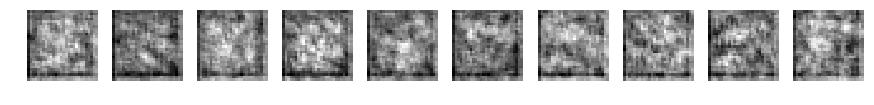

(0:00:29.403717) #2: d_loss: 0.675, d_acc: 0.840, a_loss: 0.770, a_acc: 0.020


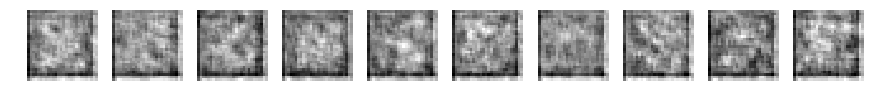

(0:00:39.998309) #3: d_loss: 0.655, d_acc: 0.745, a_loss: 0.763, a_acc: 0.090


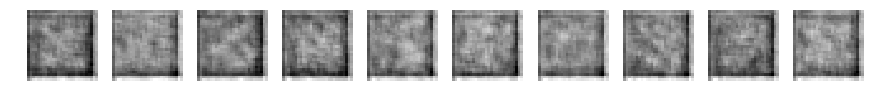

KeyboardInterrupt: 

In [1]:
import sys
sys.path.append('.prepared')
import gan as prepared

from datetime import datetime

def check():
    print(gan.fit_status())
    gan.plot_images(noise=check_noise)

gan = prepared.MNIST_DCGAN()
check_noise = gan.noise(10)
gan.fit(prepared.x_train, batch_size=100, callback=check, epochs=10)

In [ ]:
from datetime.datetime import now
a = datetime.now()                 
b = datetime.now() - a
print(b)